In [2]:
import synergy
from synergy.combination import MuSyC
from synergy.utils.dose_tools import grid
synergy.__version__

'0.4.7'

In [3]:
E0, E1, E2, E3 = 1, 0.7, 0.4, 0.
h1, h2 = 2.3, 0.8
C1, C2 = 1e-2, 1e-1
alpha12, alpha21 = 3.2, 1.1
gamma12, gamma21 = 2.5, 0.8

truemodel = MuSyC(E0=E0, E1=E1, E2=E2, E3=E3, h1=h1, h2=h2, C1=C1, C2=C2, alpha12=alpha12, \
              alpha21=alpha21, gamma12=gamma12, gamma21=gamma21)

In [4]:
print(truemodel)

MuSyC(E0=1.00, E1=0.70, E2=0.40, E3=0.00, h1=2.30, h2=0.80, C1=1.00e-02, C2=1.00e-01, alpha12=3.20, alpha21=1.10, beta=0.67, gamma12=2.50, gamma21=0.80)


In [5]:
print(truemodel.E(C1, C2))

0.33483787026364


In [6]:
d1, d2 = grid(C1/1e2, C1*1e2, C2/1e2, C2*1e2, 8, 8)
print(d1.shape, d2.shape)

(64,) (64,)


In [7]:
E = truemodel.E(d1, d2)
print(E.shape)

(64,)


In [8]:
import numpy as np

E_noisy = E * (1+0.1*(2*np.random.rand(len(E))-1))
print(E_noisy.shape)

(64,)


In [9]:
model = MuSyC()
model.fit(d1, d2, E_noisy, bootstrap_iterations=100)
print(model)

MuSyC(E0=1.00, E1=0.70, E2=0.39, E3=0.00, h1=1.87, h2=0.80, C1=1.12e-02, C2=1.13e-01, alpha12=3.82, alpha21=1.30, beta=0.64, gamma12=2.30, gamma21=1.01)


In [10]:
print(model.get_parameter_range().T)

[[ 0.97255536  1.04523887]
 [ 0.66643111  0.73633281]
 [ 0.35128902  0.4370486 ]
 [-0.01786046  0.02112517]
 [ 1.17228201  4.02814889]
 [ 0.6418212   1.0345023 ]
 [ 0.00800859  0.01632203]
 [ 0.08481973  0.16039952]
 [ 2.73195785  5.53049814]
 [ 0.74534016  2.00268776]
 [ 1.74313906  3.02387489]
 [ 0.40888738  1.96420184]]


In [11]:
print(truemodel.summary())

beta	0.67	(>0) synergistic
alpha12	3.20	(>1) synergistic
alpha21	1.10	(>1) synergistic
gamma12	2.50	(>1) synergistic
gamma21	0.80	(<1) antagonistic


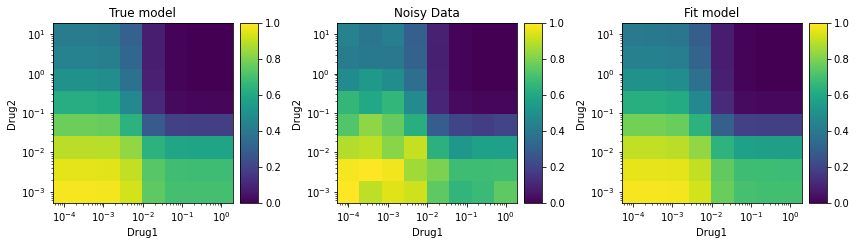

In [12]:
from matplotlib import pyplot as plt
from synergy.utils import plots

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(131)
truemodel.plot_heatmap(d1, d2, xlabel="Drug1", ylabel="Drug2", cmap="viridis",title="True model", ax=ax, vmin=0, vmax=1)

ax = fig.add_subplot(132)
plots.plot_heatmap(d1, d2, E_noisy, ax=ax, title="Noisy Data", cmap="viridis", xlabel="Drug1", ylabel="Drug2", vmin=0, vmax=1)

ax = fig.add_subplot(133)
model.plot_heatmap(d1, d2, xlabel="Drug1", ylabel="Drug2", cmap="viridis",title="Fit model", ax=ax, vmin=0, vmax=1)

plt.tight_layout()